In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Reading data from .csv file
data = np.genfromtxt('data_852.356_without_filter.csv', delimiter=',')

NameError: name 'np' is not defined

In [ ]:
%matplotlib notebook
plt.plot(data[:,0])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [5]:
np.argmin(data[62000:72000,0])+62000, np.argmax(data[62000:72000,0])+62000

(62349, 66444)

In [6]:
# ramp_0 = data[62349:66444,0]
# pd1_0 = data[62349:66444,1]
# pd2_0 = data[62349:66444,2]

ramp_0 = data[840399:844494,0]
pd1_0 = data[840399:844494,1]
pd2_0 = data[840399:844494,2]

<IPython.core.display.Javascript object>


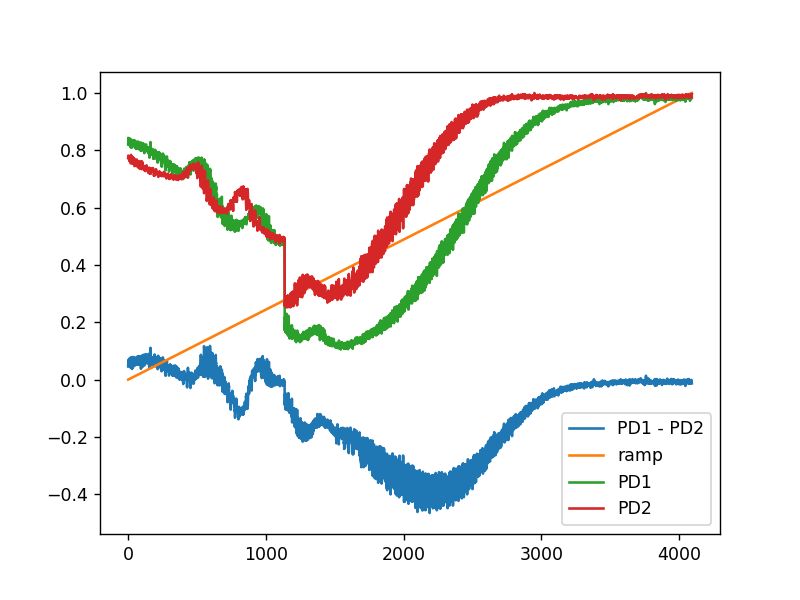

In [7]:
plt.close()
plt.plot(pd1_0/np.max(pd1_0) - pd2_0/np.max(pd2_0), label="PD1 - PD2")
plt.plot(ramp_0/np.max(ramp_0), label = "ramp")
plt.plot(pd1_0[:]/np.max(pd1_0), label = "PD1")
plt.plot(pd2_0[:]/np.max(pd2_0), label = "PD2")
plt.legend()
plt.show()

In [8]:
error = pd1_0 - pd2_0

In [9]:
avg_error = []
avg_filter = [0]*100

deri = []
deri_filter = [0]*60

d_curr = 1  # -1 -> -ve and +1 -> +ve
d_prev = 1

max_val_index = 0
max_val = 5
min_val_index = 0
min_val = 5
min_index = []
max_index = []
change = False
for i in range(0, len(error)):
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))
    if(i>0):
        deri_filter.pop(0)
        deri_filter.append(avg_error[-1] - avg_error[-2])
        deri.append(np.average(deri_filter))
    if(avg_error[i] > max_val):
        max_val_index = i
        max_val = avg_error[i]
    if(avg_error[i] < min_val):
        min_val_index = i
        min_val = avg_error[i]
    if(i>1):
        if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
            min_index.append(min_val_index)
            min_val = 5
        if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
            max_index.append(max_val_index)
            max_val = -5
        

In [10]:
# min_index, max_index

<IPython.core.display.Javascript object>


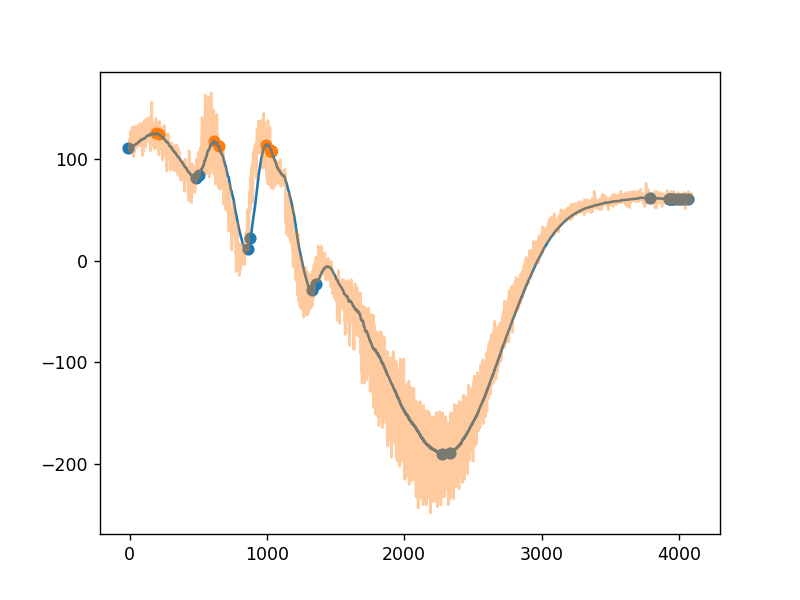

In [13]:
plt.close()
plt.plot([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i-10 for i in min_index], [avg_error[i]- np.mean(avg_error[10:]) for i in min_index])
plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
# plt.scatter([1,98,608,986,2482],[-0.01, -3.4, -29.68, -100.3, -308.09])
# plt.plot(np.asarray(deri[10:])*10)
plt.plot((pd1_0 - pd2_0)-np.mean(pd1_0-pd2_0), label="PD1 - PD2", alpha = 0.4)
plt.show()


<IPython.core.display.Javascript object>


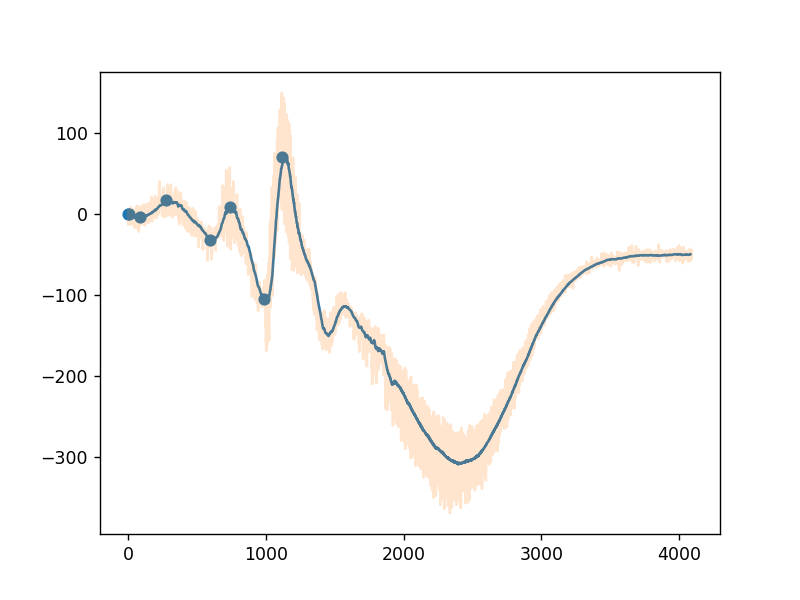

In [41]:
plt.close()
plt.plot([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]))
# plt.scatter([i-10 for i in min_index], [avg_error[i] for i in min_index])
# plt.scatter([i-10 for i in max_index], [avg_error[i] for i in max_index])
# plt.scatter([1,87,594,986,2446],[-0.01, -4.4333, -32.2, -104.55, -308.09])
# plt.scatter([6,272,738,1120],[0.16, 16.55, 8.2666, 70.3])
plt.plot((pd1_0 - pd2_0), label="PD1 - PD2", alpha = 0.2)
plt.scatter([1,6,87,272,594,738,986,1120],[-0.017, 0.266, -4.433, 16.55, -32.2, 8.267, -104.55, 70.3])
# plt.plot(np.asarray(deri[10:])*10)
plt.show()


In [15]:
i = 0
j = 0
c = []
while(i<len(min_index) and j<len(max_index)):
    if(min_index[i] < max_index[j]):
        c.append((min_index[i],0))
        i+=1
    else:
        c.append((max_index[j],1))
        j+=1
        
while(i<len(min_index)):
    c.append((min_index[i],0))
    i+=1
    
while(j<len(max_index)):
    c.append((max_index[j],1))
    j+=1

In [17]:
([92, 140, 624, 669, 1018, 1050, 1465, 1519],
 [0, 313, 369, 742, 742, 1149, 1204, 1204])

([92, 140, 624, 669, 1018, 1050, 1465, 1519],
 [0, 313, 369, 742, 742, 1149, 1204, 1204])

In [28]:
c

[(0, 1),
 (92, 0),
 (140, 0),
 (313, 1),
 (369, 1),
 (624, 0),
 (669, 0),
 (742, 1),
 (742, 1),
 (1018, 0),
 (1050, 0),
 (1149, 1),
 (1204, 1),
 (1204, 1),
 (1465, 0),
 (1519, 0)]

In [29]:
a = 0
prev = None
curr = None
d = []
while(a<len(c)):
    curr = c[a]
    j = a
    while(c[j][1] == c[a][1]):
        a+=1
        if(a==len(c)):
            break
    d.append(curr)
print(d)

[(0, 1), (92, 0), (313, 1), (624, 0), (742, 1), (1018, 0), (1149, 1), (1465, 0)]


In [30]:
i = 0
while(i<len(d)-1):
    print(d[i][0] - d[i+1][0])
    i+=1

-92
-221
-311
-118
-276
-131
-316


<IPython.core.display.Javascript object>


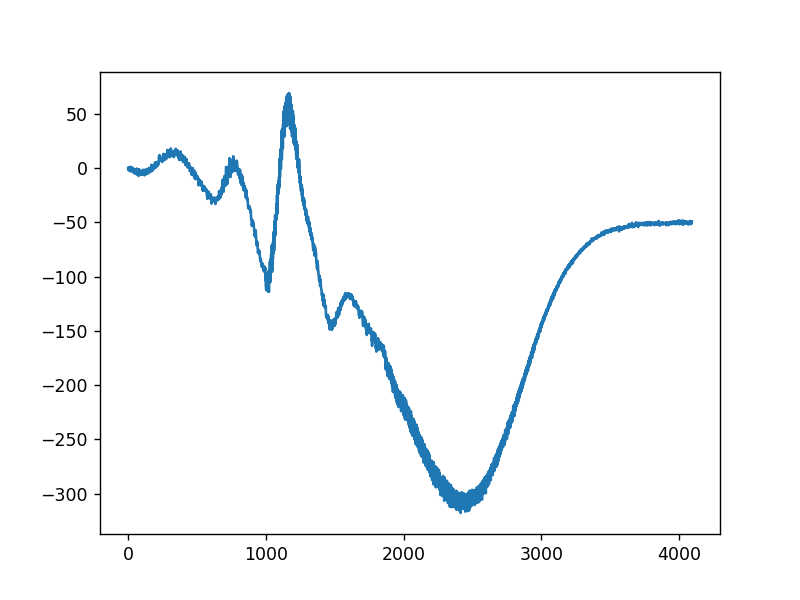

In [129]:
dt = 1/1330
fc = 50
alpha = 2*np.pi*dt*fc/(2*np.pi*dt*fc+1)

y_avg = []
avg_filter = [0]*100
y = [error[0]]
for i in error:
    avg_filter.pop(0)
    avg_filter.append(i)
#     y_avg.append(np.average(avg_filter))
#     y_t = alpha*i + (1.0-alpha)*y_avg[-1]
#     y_avg.append(y_t)
    y_prev = np.average(avg_filter)
    y_t = alpha*i + (1.0-alpha)*y_prev
    y_avg.append(y_t)
plt.close()
plt.plot(y_avg[1:], label = 'filtered LP')
# plt.plot(data[:,4], label = 'original')
plt.show()

In [61]:
## Code structure compatible to code in stm

In [122]:
avg_error = []
avg_filter = [0]*10

deri = []
deri_filter = [0]*140

d_curr = 1  # -1 -> -ve and +1 -> +ve
d_prev = 1

max_val_index = 0
max_val = 5
min_val_index = 0
min_val = 5

min_index = []
min_value = []
max_index = []
max_value = []
change = False
for i in range(0, len(error)):
    avg_filter.pop(0)
    avg_filter.append(error[i])
#     avg_error.append(np.average(avg_filter))
    y_t = alpha*i + (1.0-alpha)*np.average(avg_filter)
    avg_error.append(y_t)
    if(i>0):
        deri_filter.pop(0)
        deri_filter.append(avg_error[-1] - avg_error[-2])
        deri.append(np.average(deri_filter))
    if(avg_error[i] > max_val):
        max_val_index = i
        max_val = avg_error[i]
    if(avg_error[i] < min_val):
        min_val_index = i
        min_val = avg_error[i]
    if(i>1):
        if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
            min_index.append(min_val_index)
            min_value.append((min_val_index, min_val))
            min_val = 5
        if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
            max_index.append(max_val_index)
            max_value.append((max_val_index, max_val))
            max_val = -5

<IPython.core.display.Javascript object>


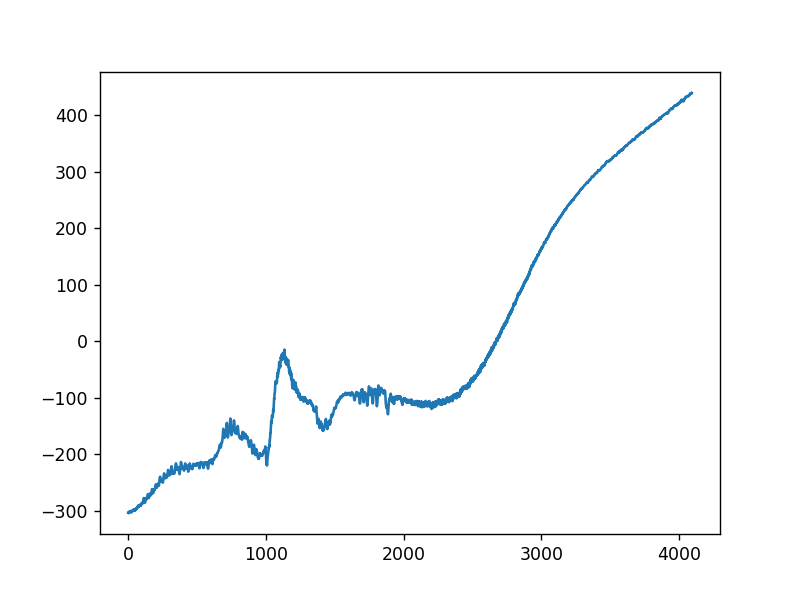

In [123]:
plt.close()
plt.plot([i for i in range(0,len(avg_error[0:]))],np.asarray(avg_error[0:]) - np.mean(avg_error[0:]))
# plt.scatter([i[0] for i in min_value], [i[1] - np.mean(avg_error[10:]) for i in min_value])
# plt.scatter([i[0] for i in max_value], [i[1] - np.mean(avg_error[10:]) for i in max_value])
# plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
plt.show()

In [ ]:
plt.plot([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i-10 for i in min_index], [avg_error[i]- np.mean(avg_error[10:]) for i in min_index])
plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
# plt.plot(ramp_0/np.max(ramp_0)*100)
# plt.plot(np.asarray(deri[10:])*10)
plt.show()

In [71]:
threshold = 150

In [78]:
for i in range(0, len(max_value)):
    if(i == len(min_value)-1):
        break;
    sig_amp = max_value[i][1] - min_value[i][1]
#     if(abs(threshold - sig_amp)<0.5*sig_amp):
#         print((abs(max_value[i][1]) + abs(min_value[i][1]))/2)
    print(sig_amp, max_value[i][0], min_value[i][0])
        
        
# for (uint8_t i=0; i<len; i++){
# 	    if(i == minima_time.size()-1) break;
# 	    sig_amp = maxima_time[i] - minima_time[i];
# 	    hello++;
# //	    sig_amp = *(max_ptr+(i+max_front)%len) - *(min_ptr+(i+min_front)%len);
# 	    if(abs(threshold-sig_amp)<1*sig_amp){
# 	      lockpoint_found = true;
# 	      set_point_time = (maxima_time[i] + minima_time[i]);
# 	    }
# 	  }

10.475 0 92
15.5875 347 168
40.6875 396 635
23.9625 764 690
102.3125 764 1018
127.4125 1161 1069
